<a href="https://colab.research.google.com/github/Walvaradop27/ia/blob/main/Taller_Fuzzy_William_Alvarado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalando librerias

In [ ]:
!pip install scikit-fuzzy

# 2. Importar librerias

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

### **PASO 1. Variable de entrada**

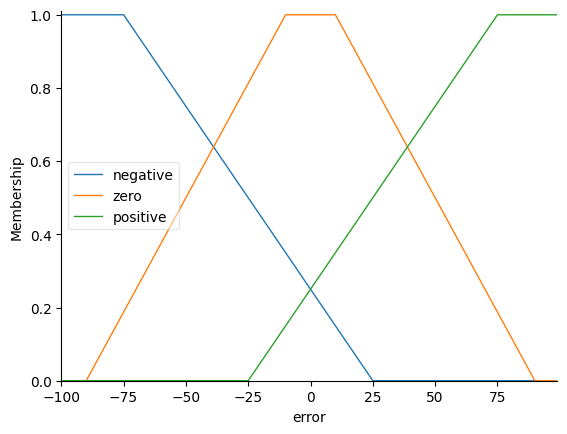

In [ ]:
error = ctrl.Antecedent(np.arange(-100,100,1),'error')
error['negative'] = fuzz.trapmf(error.universe,[-100,-100,-75,25])
#error['zero'] = fuzz.trimf(error.universe,[-50,0,50])
error['zero'] = fuzz.trapmf(error.universe,[-90,-10,10,90])
error['positive'] = fuzz.trapmf(error.universe,[-25,75,100,100])
error.view()

### **PASO 2. Variable de salida**

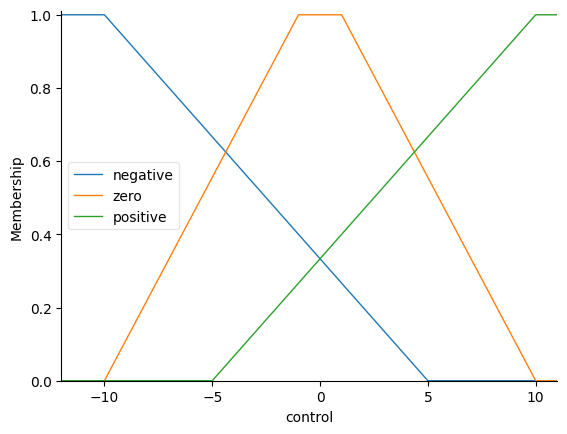

In [ ]:
control = ctrl.Consequent(np.arange(-12,12,1), 'control')
control['negative'] = fuzz.trapmf(control.universe,[-12,-12,-10,5])
control['zero'] = fuzz.trapmf(control.universe,[-10,-1,1,10])
control['positive'] = fuzz.trapmf(control.universe,[-5,10,12,12])
control.view()

### **PASO 3. Inferencia**

In [ ]:
rule1 = ctrl.Rule(error['negative'],control['negative'])
rule2 = ctrl.Rule(error['zero'],control['zero'])
rule3 = ctrl.Rule(error['positive'],control['positive'])

In [ ]:
control_sys = ctrl.ControlSystem([rule1,rule2,rule3])
control_sim = ctrl.ControlSystemSimulation(control_sys)

### **PASO 4. Evaluar/SImular en un punto**

Salida defuzzificada = 1.4475565451775458
Salida defuzzificada  redondeada= 1.45


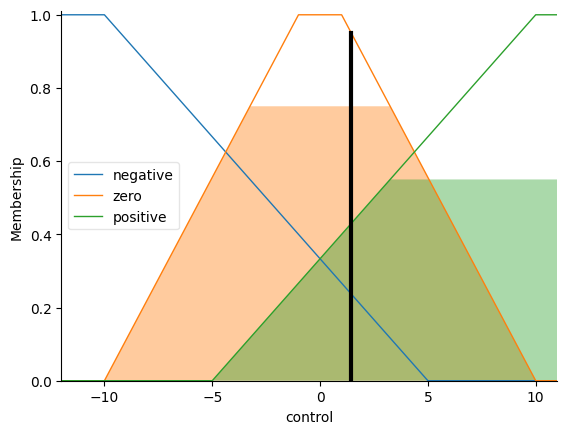

In [ ]:
control_sim.input['error'] = 30
control_sim.compute()
control.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control'])
print("Salida defuzzificada  redondeada=", round(control_sim.output['control'],2))

### **Paso 5. Gráfica de salida - Contorno**

In [ ]:
error_values = np.linspace(-100,100,2001)
out = np.zeros_like(error_values)
n = error_values.size

In [ ]:
for i in range (n):
  control_sim.input['error'] = error_values[i]
  control_sim.compute()
  out[i]  = control_sim.output['control']

In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'acción de control [V]')

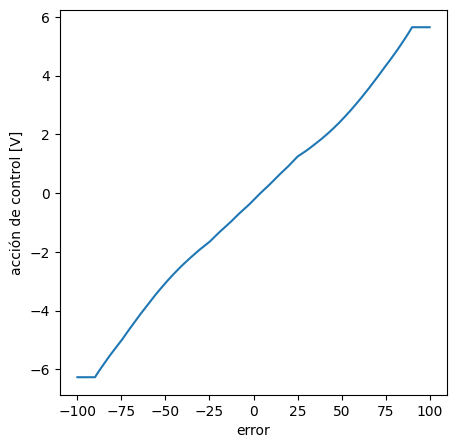

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.plot(error_values,out)
plt.xlabel('error')
plt.ylabel('acción de control [V]')

#Implementando 5mf

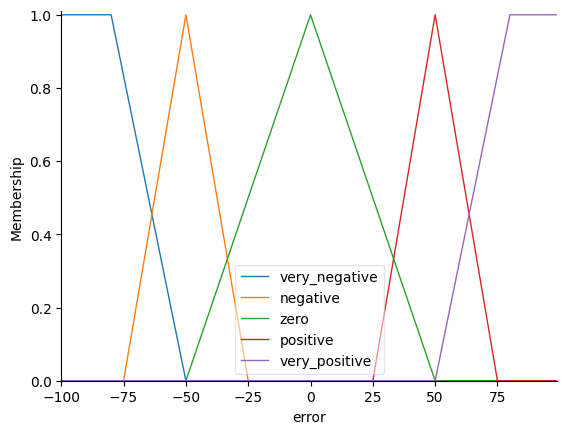

In [4]:
error = ctrl.Antecedent(np.arange(-100, 100, 1), 'error')
error['very_negative'] = fuzz.trapmf(error.universe, [-100, -100, -80, -50])  # New MF
error['negative'] = fuzz.trimf(error.universe, [-75, -50, -25])  # Modified MF
error['zero'] = fuzz.trimf(error.universe, [-50, 0, 50])        # Modified MF
error['positive'] = fuzz.trimf(error.universe, [25, 50, 75])   # Modified MF
error['very_positive'] = fuzz.trapmf(error.universe, [50, 80, 100, 100]) # New MF
error.view()

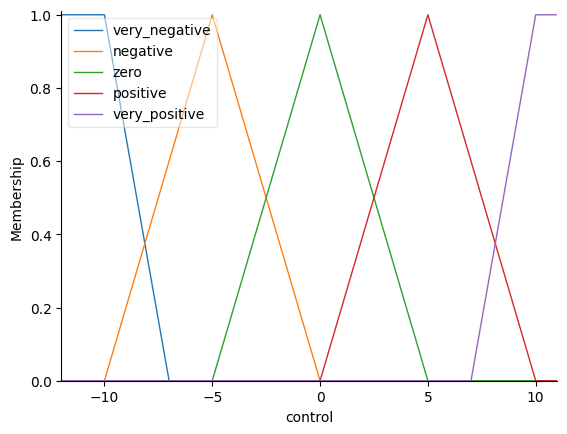

In [5]:
control = ctrl.Consequent(np.arange(-12, 12, 1), 'control')
control['very_negative'] = fuzz.trapmf(control.universe, [-12, -12, -10, -7]) # New MF
control['negative'] = fuzz.trimf(control.universe, [-10, -5, 0])  # Modified MF
control['zero'] = fuzz.trimf(control.universe, [-5, 0, 5])  # Modified MF
control['positive'] = fuzz.trimf(control.universe, [0, 5, 10])  # Modified MF
control['very_positive'] = fuzz.trapmf(control.universe, [7, 10, 12, 12])  # New MF
control.view()

In [6]:

# Define the rules with 5 MFs
rule1 = ctrl.Rule(error['very_negative'], control['very_negative'])  # New rule
rule2 = ctrl.Rule(error['negative'], control['negative'])
rule3 = ctrl.Rule(error['zero'], control['zero'])
rule4 = ctrl.Rule(error['positive'], control['positive'])
rule5 = ctrl.Rule(error['very_positive'], control['very_positive'])

In [7]:
control_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
control_sim = ctrl.ControlSystemSimulation(control_sys)

Salida defuzzificada = 1.6666666666666667
Salida defuzzificada  redondeada= 1.67


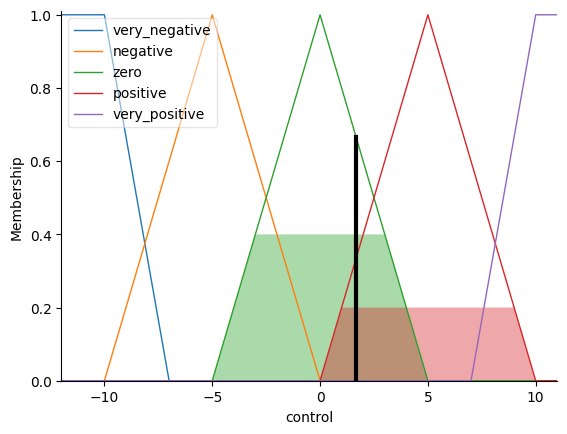

In [9]:
control_sim.input['error'] = 30
control_sim.compute()
control.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control'])
print("Salida defuzzificada  redondeada=", round(control_sim.output['control'],2))

In [13]:
import matplotlib.pyplot as plt

In [14]:
fig = plt.figure(figsize=(5, 5))
plt.plot(error_values,out)
plt.xlabel('error')
plt.ylabel('acción de control [V]')

NameError: name 'error_values' is not defined

<Figure size 500x500 with 0 Axes>